In [1]:
from data import *
from models import *
from utils import *

import torch
import torch.optim as torch_optimizer # by naming it optimizer, it will conflict with the optimizer instantiated class

100%|██████████| 9912422/9912422 [00:01<00:00, 7542220.06it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32449958.16it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 8545934.37it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4731875.00it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



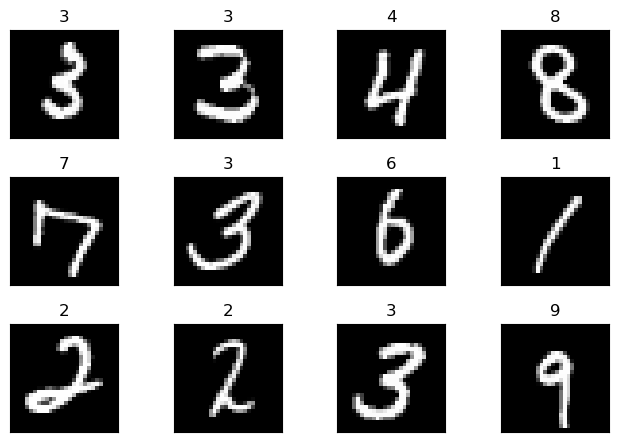

In [2]:
train_dataset, test_dataset
train_dataloader, test_dataloader

import matplotlib.pyplot as plt
batch_data, batch_label = next(iter(train_dataloader)) 

fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [3]:

model = FirstDNN()
errorFun = torch.nn.functional.nll_loss
optimizer = torch_optimizer.SGD(model.parameters(), lr=0.01, momentum=0.9)
device =torch.device("mps")

In [5]:
for epoch in range(1, 2):
	train(train_dataloader, model, errorFun, optimizer,epoch)
	test(test_dataloader, model, errorFun)

TRAIN: Batch= 1198, Batch Error = 2.302585, Batch Accuracy = 3.125000:  64%|██████▍   | 1199/1875 [10:33<03:30,  3.21it/s]

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(training_losses_epochwise)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(training_accuracy_epochwise)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_epochwise)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_accuracy_epochwise)
axs[1, 1].set_title("Test Accuracy")